# Tesseract OCR: Text localization and detection

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

In [1]:
%cd localize-text-tesseract

/content/localize-text-tesseract


### Import Packages

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
from pytesseract import Output
import pytesseract
import cv2

Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing text localization, text detection, and OCR with Tesseract

`min_conf` Filter weak text detections, a **minimum confidence**

Here, we are filtering out any text detections and OCR results that have a confidence <= 50, and as our results show, the low quality text region has been filtered out.

In [4]:
args = {
	"image": "apple_support.png",
	"min_conf": 50
}

In [5]:
# load the input image, convert it from BGR to RGB channel ordering,
# and use Tesseract to localize each area of text in the input image
image = cv2.imread(args["image"])
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

Confidence: 96
Text: Apple

Confidence: 96
Text: Support

Confidence: 96
Text: 1-800-275-2273



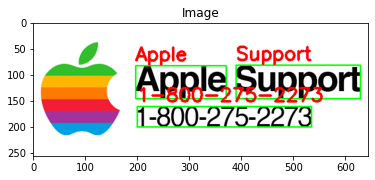

In [6]:
# loop over each of the individual text localizations
for i in range(0, len(results["text"])):
	# extract the bounding box coordinates of the text region from
	# the current result
	x = results["left"][i]
	y = results["top"][i]
	w = results["width"][i]
	h = results["height"][i]

	# extract the OCR text itself along with the confidence of the
	# text localization
	text = results["text"][i]
	conf = int(results["conf"][i])

    # filter out weak confidence text localizations
	if conf > args["min_conf"]:
		# display the confidence and text to our terminal
		print("Confidence: {}".format(conf))
		print("Text: {}".format(text))
		print("")
  
		# strip out non-ASCII text so we can draw the text on the image
		# using OpenCV, then draw a bounding box around the text along
		# with the text itself
		text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
		cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
		cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
			1.2, (0, 0, 255), 3)
  
# show the output image
plt_imshow("Image", image)